In [1]:
#importingt the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
#Generating the data
import random
products= range(10000)
users = range(1000)
purchases = []
for i in range(100000):
    u = np.random.choice(products)
    p = np.random.choice(products)
    purchases.append((u, p))

In [11]:
purchases

[(8388, 6767),
 (7183, 9349),
 (7285, 9431),
 (8349, 9192),
 (2444, 8020),
 (7903, 2768),
 (5010, 6077),
 (1909, 6306),
 (3085, 1155),
 (5813, 7477),
 (8964, 3342),
 (1321, 4495),
 (8789, 408),
 (434, 2383),
 (4804, 3586),
 (8954, 1289),
 (2729, 6672),
 (7584, 8336),
 (3026, 3455),
 (6070, 9308),
 (5797, 3889),
 (5450, 3288),
 (9719, 642),
 (2719, 8262),
 (2744, 578),
 (9424, 3346),
 (1229, 6307),
 (3145, 7331),
 (4463, 1279),
 (3418, 5611),
 (3735, 7487),
 (9647, 2987),
 (4479, 9149),
 (4152, 2104),
 (9824, 2082),
 (1978, 3673),
 (8068, 9227),
 (4964, 9176),
 (8589, 8355),
 (752, 8662),
 (5358, 6246),
 (6709, 4291),
 (2484, 8613),
 (1248, 2698),
 (5589, 38),
 (9181, 9236),
 (5011, 3106),
 (808, 1615),
 (1505, 7732),
 (6994, 3725),
 (2132, 5027),
 (2448, 6408),
 (3341, 3428),
 (3931, 845),
 (3735, 2109),
 (4319, 2845),
 (6220, 8067),
 (8476, 7253),
 (6457, 8085),
 (6538, 9018),
 (3550, 8102),
 (9105, 7235),
 (4668, 4079),
 (2725, 9143),
 (6474, 7403),
 (653, 1729),
 (7963, 3232),
 (434

In [12]:
#Creating the dataframe 
df = pd.DataFrame(purchases, columns =['user', 'products'])

In [13]:
df = df.iloc[:,0:2].values

In [14]:
df

array([[8388, 6767],
       [7183, 9349],
       [7285, 9431],
       ...,
       [6340, 8352],
       [8711, 1104],
       [3031,  886]], dtype=int64)

In [15]:
#Clustering the users into different groups based on purchases made by costumers
#To find out the number of clusters required elbow method is used to get to know about the optimum number of clusters
wscc = [] #Called 
from sklearn.cluster import KMeans
for i in range(1,15): #Will check for 15 clusters initally
    model = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 300)
    model.fit(df)
    wscc.append(model.inertia_)


Text(0.5,1,'Elbow Method Curve')

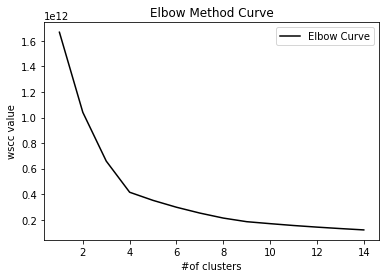

In [17]:
#Visualizing the elbow method graph
plt.plot(range(1,15), wscc, 'k', label = 'Elbow Curve')
plt.xlabel('#of clusters')
plt.ylabel('wscc value')
plt.legend()
plt.title('Elbow Method Curve')

In [20]:
#By looking the graph, the wscc value decrease rapidily till 4 clusters there after the change in value is minimum.
#Will choose 4 clusters
model = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300)
y_means = model.fit_predict(df)

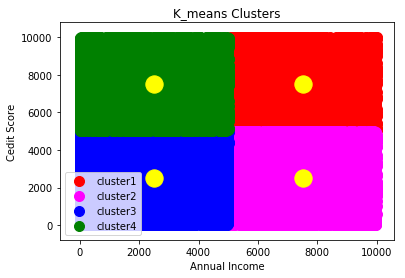

In [22]:
#Visualizing the result
plt.scatter(df[y_means == 0, 0], df[y_means == 0, 1], s = 100, c = "red", label = "cluster1" )
plt.scatter(df[y_means == 1, 0], df[y_means == 1, 1], s = 100, c = "magenta", label = "cluster2")
plt.scatter(df[y_means == 2, 0], df[y_means == 2, 1], s = 100, c = "blue", label = "cluster3")
plt.scatter(df[y_means == 3, 0], df[y_means == 3, 1], s = 100, c = "green", label = "cluster4")
plt.scatter(df[y_means == 4, 0], df[y_means == 4, 1], s = 100, c = "black", label = "cluster5")
plt.title("K_means Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Cedit Score")
plt.legend()
plt.show()
